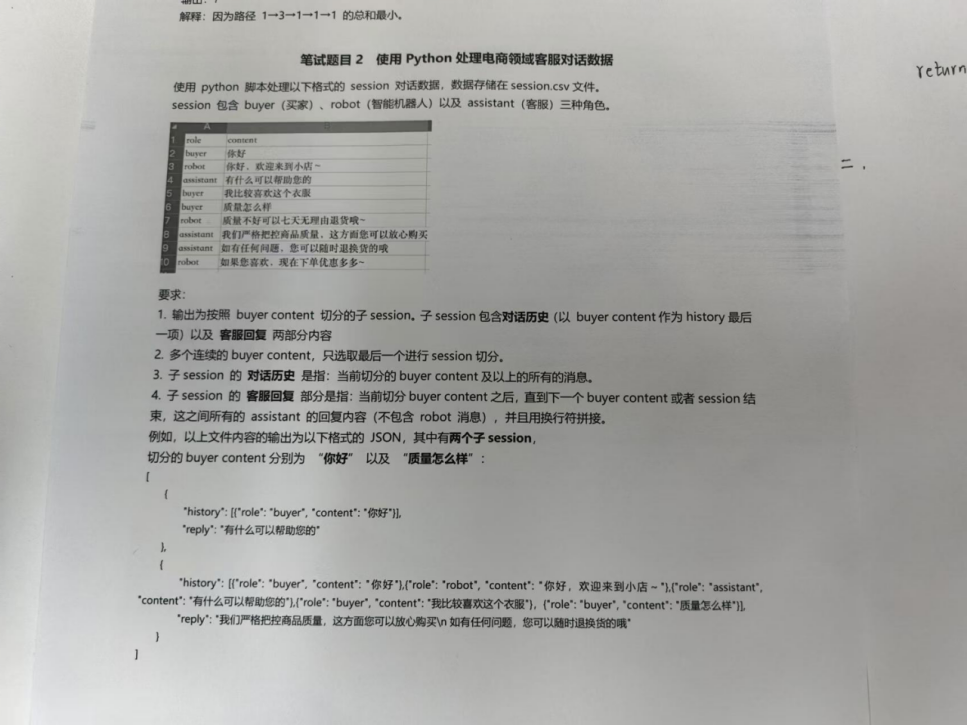


# 题目描述
> excel 数据集。数据role列为角色，分为‘buyer’、‘assistant’、‘robot’。content列为数据信息列
> 1. 输出按照buyer content 切分的子session.子session 包括**对话历史**(以 buyer content作为history 最后一项) 以及 **客服回答**两部分内容.即history 和 reply
> 2. 多个连续的buyer content,只选取最后一个进行session进行切分
> 3. 子session 的**对话历史(history)**是指:当前切分的buyer content及以上的所有消息
> 4. 子session 的**客服回答(reply)**是指: 当前切分buyer content之后,直至下一个buyer content 或者 session结束,这之间的所有assiant的回复内容(不包括robot消息),并且用换行符进行拼接
例如:
以上文件内容的输出为以下格式的JSON，其中有两个子session，切分的 buyer content分别为“你好”以及“质量怎么样”:
[
    {
        "history": [{"role": "buyer","content": "你好"}],
        "reply":"有什么可以帮助您的"
    },
    {
        "history": [{"role": "buyer", "content": "你好"},{"role": "robot", "content": "你好，欢迎来到小店~"},{"role": "assistant","content":"有什么可以帮助您的"},{"role":"buyer","content":"我比较喜欢这个衣服"},{"role":"buyer","content":"质量怎么样"}]
        "reply":"我们严格把控商品质量，这方面您可以放心购买\n 如有任何问题，您可以随时退换货的哦"
    }
]

***要点***
> 重点注意多轮对话情况/并且注意区分身份信息,robot的回复不要加入到reply里面

1. 读取数据：加载 Excel 文件并筛选 role 和 content 列。
2. 构建子会话：遍历数据行，识别 buyer 内容为切分点的子会话。
3. 构建对话历史：记录每个 buyer content 及其之前的所有消息作为 history。
4. 构建客服回复：记录 buyer content 后的连续 assistant 消息并用换行符拼接，直到下一个 buyer content 或会话结束。
5. 生成 JSON 输出。

In [1]:
import pandas as pd
import json

# 读取 Excel 文件
file_path = 'your_excel_file.xlsx'  # 请替换为你的 Excel 文件路径
df = pd.read_excel(file_path)

# 创建一个列表来存储每个子 session
sessions = []
history = []  # 用于存储对话历史

for i, row in df.iterrows():
    role, content = row['role'], row['content']
    
    # 处理 buyer 的内容，作为会话切分点
    if role == 'buyer':
        # 检查是否已经有历史记录，如果有则创建一个子 session
        if history:
            # 从上一个 buyer content 开始，构建 reply 部分
            reply_list = []
            for j in range(i + 1, len(df)):
                next_role, next_content = df.loc[j, 'role'], df.loc[j, 'content']
                if next_role == 'buyer':
                    break
                elif next_role == 'assistant':
                    reply_list.append(next_content)
            
            # 将 reply 列表连接成字符串
            reply = '\n'.join(reply_list)
            # 添加子 session 到 sessions 列表
            sessions.append({
                "history": history.copy(),
                "reply": reply
            })

        # 开始一个新的历史记录，从当前 buyer 开始
        history.append({"role": role, "content": content})

    else:
        # 如果不是 buyer，将当前消息加入到 history，但 robot 消息不影响 reply
        history.append({"role": role, "content": content})

# 输出结果为 JSON 格式
json_output = json.dumps(sessions, ensure_ascii=False, indent=4)
print(json_output)


KeyboardInterrupt: 